In [58]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

In [59]:
df_cust = pd.read_csv('customer_data_200.csv')
df_cust

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,49,86235,68
1,2,Female,56,74240,58
2,3,Male,49,85726,75
3,4,Male,21,30492,29
4,5,Male,47,26102,36
...,...,...,...,...,...
195,196,Female,54,95353,6
196,197,Female,41,96797,82
197,198,Female,46,85953,69
198,199,Male,63,77458,47


In [60]:
df_cust.rename(columns={"CustomerID" : "Customer ID"}, inplace=True)
df_cust.rename(columns={"AnnualIncome" : "Annual Income"}, inplace=True)
df_cust.rename(columns={"SpendingScore" : "Spending Score"}, inplace=True)


In [61]:
df_cust

,Customer ID,Gender,Age,Annual Income,Spending Score
0,1,Male,49,86235,68
1,2,Female,56,74240,58
2,3,Male,49,85726,75
3,4,Male,21,30492,29
4,5,Male,47,26102,36
...,...,...,...,...,...
195,196,Female,54,95353,6
196,197,Female,41,96797,82
197,198,Female,46,85953,69
198,199,Male,63,77458,47


In [62]:
from sklearn.cluster import KMeans

In [63]:
### Basic Clustering On Age & Spending in 2D Format

In [64]:
df_cust_2d = df_cust[["Age", "Spending Score"]]
df_cust_2d

,Age,Spending Score
0,49,68
1,56,58
2,49,75
3,21,29
4,47,36
...,...,...
195,54,6
196,41,82
197,46,69
198,63,47


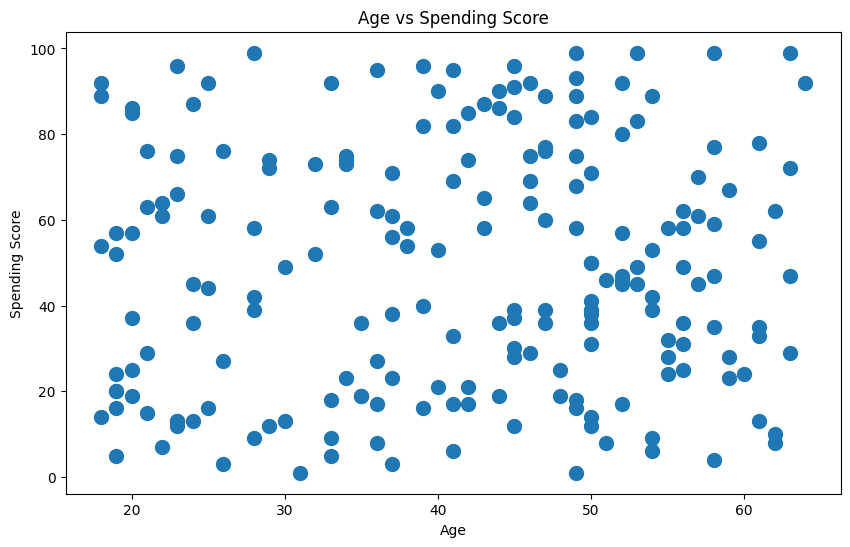

In [65]:
plt.subplots(figsize=(10, 6) )
plt.scatter(x='Age', y= 'Spending Score',data=df_cust_2d, s=100)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Spending Score')
plt.savefig('Age vs Spending Score.png')
plt.show()

In [66]:
### Decide the K - Value:

elbow = df_cust_2d[['Age','Spending Score']].values # To get the 2-D array

In [67]:
elbow

array([[49, 68],
       [56, 58],
       [49, 75],
       [21, 29],
       [47, 36],
       [54, 89],
       [40, 21],
       [56, 36],
       [62, 10],
       [32, 73],
       [60, 24],
       [46, 64],
       [53, 99],
       [30, 49],
       [49, 99],
       [24, 36],
       [39, 82],
       [45, 96],
       [19, 24],
       [59, 23],
       [62, 62],
       [23, 96],
       [45, 37],
       [45, 12],
       [61, 55],
       [61, 13],
       [37, 23],
       [47, 89],
       [28, 99],
       [45, 30],
       [42, 17],
       [56, 62],
       [50, 84],
       [18, 89],
       [44, 86],
       [30, 13],
       [58, 59],
       [20, 19],
       [56, 49],
       [23, 12],
       [25, 61],
       [44, 19],
       [26, 76],
       [54,  9],
       [50, 71],
       [59, 28],
       [61, 78],
       [41, 95],
       [32, 52],
       [49, 83],
       [49, 16],
       [41, 69],
       [58, 99],
       [29, 12],
       [56, 25],
       [19, 52],
       [20, 85],
       [54, 53],
       [34, 23

In [68]:
interia = []

In [69]:
for n in range(1,11):
    algo = KMeans(n_clusters=n, init='k-means++', n_init=11, max_iter=300, tol=1, random_state=45, algorithm='elkan')
    algo.fit(elbow)
    interia.append(algo.inertia_)

/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_kmeans.py:1408: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


In [70]:
interia

[195618.6350000001,
 74088.06560659067,
 52623.924354970666,
 40049.205800777876,
 31223.572883765257,
 26568.64082814411,
 20992.01990344979,
 18619.154691887914,
 17174.3145312708,
 14694.486317246994]

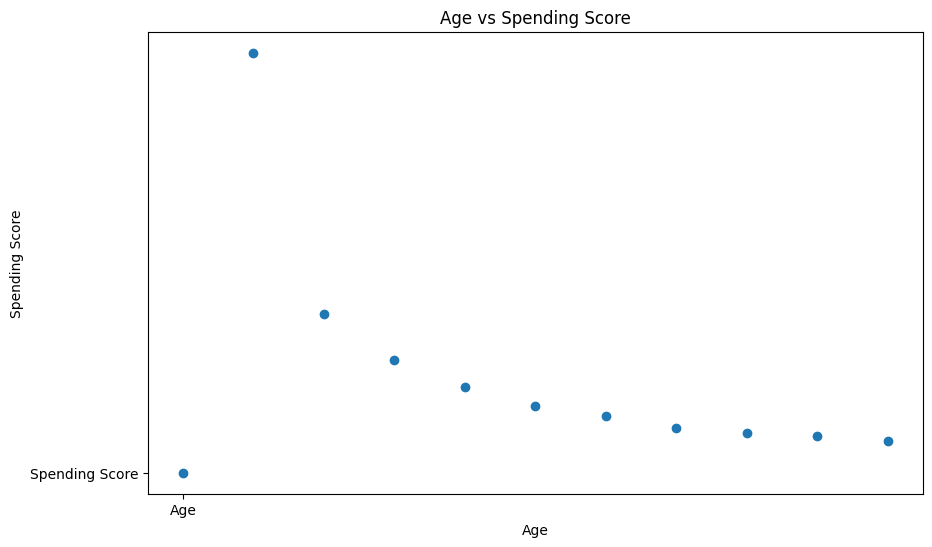

In [95]:
### Plot the Elbow Chart

plt.subplots(figsize=(10, 6))
plt.scatter(x='Age', y='Spending Score')
plt.plot(range(1,11), interia, 'o') #algin with number of cluster
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.savefig('Age vs Spending Score1.1.png')
plt.show()

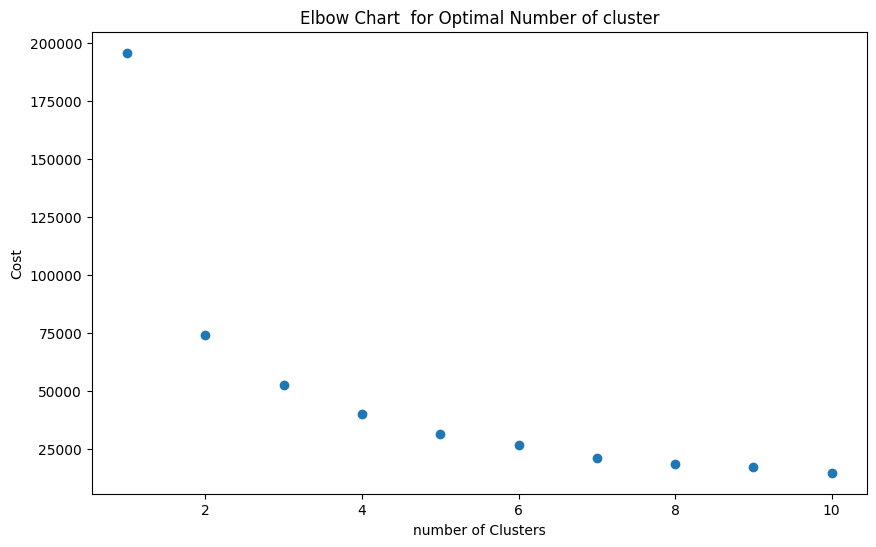

In [93]:

plt.subplots(figsize = (10, 6))
plt.plot(range(1,11), interia, 'o') #algin with number of cluster
plt.title('Elbow Chart  for Optimal Number of cluster')
plt.xlabel('number of Clusters')
plt.ylabel('Cost')
plt.savefig('Age vs Spending Score1.png')
plt.show()

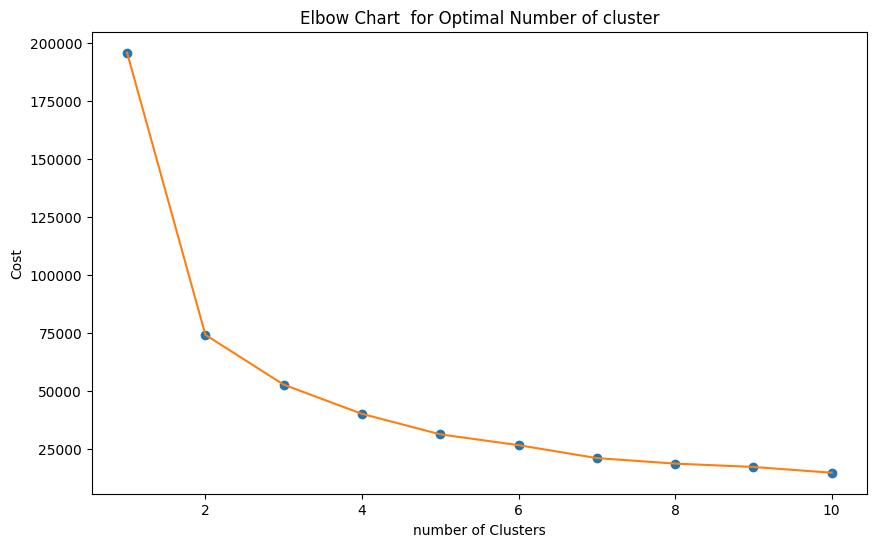

In [92]:

plt.subplots(figsize = (10, 6))
plt.plot(range(1,11), interia, 'o')
plt.plot(range(1,11), interia, '-')  #algin with number of cluster
plt.title('Elbow Chart  for Optimal Number of cluster')
plt.xlabel('number of Clusters')
plt.ylabel('Cost')
plt.savefig('Age vs Spending Score2.png')
plt.show()

In [79]:
### Let us start with K=3

algo_3= KMeans(n_clusters=3,init='k-means++', n_init=3, max_iter=300, tol=1, random_state=45, algorithm='elkan')
algo_3.fit(elbow)


KMeans(algorithm='elkan', n_clusters=3, n_init=3, random_state=45, tol=1)

In [86]:
labels1 = algo_3.labels_

In [87]:
centroids1 = algo_3.cluster_centers_

In [88]:
labels1

array([1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 2, 1, 2, 0, 2, 2, 0, 0, 1, 2,
       0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 2, 1, 2, 0, 1, 2, 0, 0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 2, 0, 1, 2, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 2, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 2, 0, 0, 1, 0, 0, 2, 1,
       1, 0], dtype=int32)

In [89]:
centroids1

array([[40.45121951, 19.90243902],
       [41.18918919, 56.90540541],
       [43.45454545, 87.93181818]])

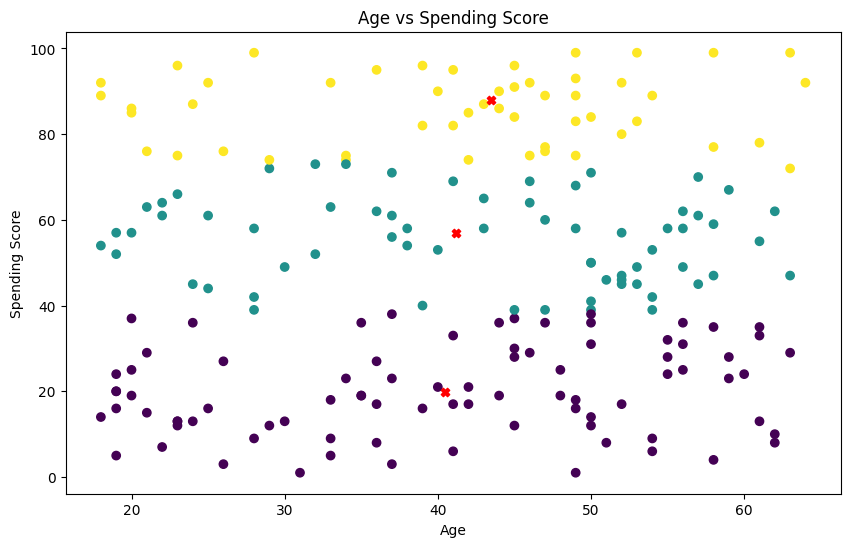

In [96]:
### Plot the Cluster

plt.subplots(figsize = (10, 6))
plt.scatter(elbow[:,0], elbow[:,1], c=labels1,cmap='viridis')
plt.scatter(centroids1[:,0], centroids1[:,1], c='red',marker='X')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Spending Score')
plt.savefig('Age vs Spending Score3.png')
plt.show()


In [97]:
### Let us start with K=4

algo_4= KMeans(n_clusters=4,init='k-means++', n_init=4, max_iter=300, tol=1, random_state=45, algorithm='elkan')
algo_4.fit(elbow)

KMeans(algorithm='elkan', n_clusters=4, n_init=4, random_state=45, tol=1)

In [101]:
labels2 = algo_4.labels_

In [102]:
centroids2 = algo_4.cluster_centers_

In [103]:
labels2

array([2, 2, 2, 0, 3, 1, 0, 3, 0, 2, 3, 2, 1, 3, 1, 3, 1, 1, 0, 3, 2, 1,
       3, 0, 3, 0, 0, 1, 1, 3, 0, 2, 1, 1, 1, 0, 2, 0, 3, 0, 2, 0, 2, 0,
       2, 3, 2, 1, 2, 1, 0, 2, 1, 0, 3, 2, 1, 3, 0, 0, 2, 3, 2, 3, 2, 3,
       0, 1, 0, 3, 1, 1, 2, 0, 2, 0, 2, 2, 0, 0, 3, 0, 3, 3, 0, 3, 0, 2,
       0, 3, 3, 3, 1, 0, 2, 1, 0, 2, 1, 3, 0, 3, 2, 3, 0, 2, 2, 3, 1, 2,
       1, 0, 3, 2, 3, 0, 1, 2, 0, 1, 2, 2, 3, 0, 0, 2, 1, 2, 2, 0, 2, 3,
       3, 0, 2, 3, 3, 3, 3, 2, 3, 0, 1, 1, 2, 3, 1, 0, 0, 2, 0, 3, 3, 0,
       0, 3, 0, 2, 0, 0, 1, 2, 2, 0, 2, 1, 0, 2, 2, 3, 3, 0, 1, 3, 1, 0,
       2, 2, 3, 3, 1, 3, 2, 0, 2, 0, 2, 3, 1, 2, 1, 3, 0, 3, 3, 0, 1, 2,
       3, 0], dtype=int32)

In [104]:
centroids2

array([[37.77419355, 15.46774194],
       [39.94117647, 90.73529412],
       [40.875     , 66.64285714],
       [47.66666667, 40.33333333]])

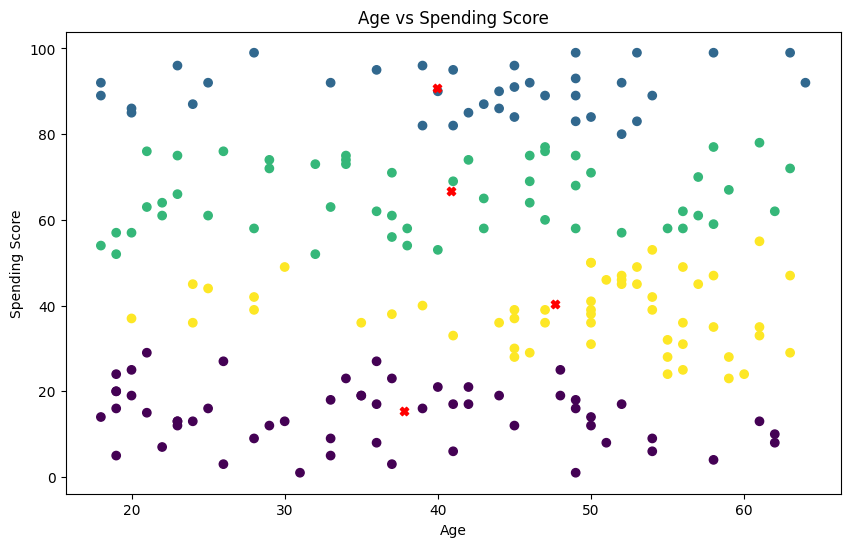

In [106]:
### Plot the Cluster

plt.subplots(figsize = (10, 6))
plt.scatter(elbow[:,0], elbow[:,1], c=labels2, cmap='viridis')
plt.scatter(centroids2[:,0], centroids2[:,1], c='red', marker='X')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Spending Score')
plt.savefig('Age vs Spending Score4.png')
plt.show()


In [107]:
elbow

array([[49, 68],
       [56, 58],
       [49, 75],
       [21, 29],
       [47, 36],
       [54, 89],
       [40, 21],
       [56, 36],
       [62, 10],
       [32, 73],
       [60, 24],
       [46, 64],
       [53, 99],
       [30, 49],
       [49, 99],
       [24, 36],
       [39, 82],
       [45, 96],
       [19, 24],
       [59, 23],
       [62, 62],
       [23, 96],
       [45, 37],
       [45, 12],
       [61, 55],
       [61, 13],
       [37, 23],
       [47, 89],
       [28, 99],
       [45, 30],
       [42, 17],
       [56, 62],
       [50, 84],
       [18, 89],
       [44, 86],
       [30, 13],
       [58, 59],
       [20, 19],
       [56, 49],
       [23, 12],
       [25, 61],
       [44, 19],
       [26, 76],
       [54,  9],
       [50, 71],
       [59, 28],
       [61, 78],
       [41, 95],
       [32, 52],
       [49, 83],
       [49, 16],
       [41, 69],
       [58, 99],
       [29, 12],
       [56, 25],
       [19, 52],
       [20, 85],
       [54, 53],
       [34, 23

In [108]:
df_labels_4 = pd.DataFrame(labels2)
df_labels_4

,0
0,2
1,2
2,2
3,0
4,3
...,...
195,0
196,1
197,2
198,3


In [109]:
pd.concat([df_cust, df_labels_4], axis=1)

,Customer ID,Gender,Age,Annual Income,Spending Score,0
0,1,Male,49,86235,68,2
1,2,Female,56,74240,58,2
2,3,Male,49,85726,75,2
3,4,Male,21,30492,29,0
4,5,Male,47,26102,36,3
...,...,...,...,...,...,...
195,196,Female,54,95353,6,0
196,197,Female,41,96797,82,1
197,198,Female,46,85953,69,2
198,199,Male,63,77458,47,3


In [110]:
df_cust_with_cluster = pd.concat([df_cust, df_labels_4], axis=1)

In [111]:
df_cust_with_cluster

,Customer ID,Gender,Age,Annual Income,Spending Score,0
0,1,Male,49,86235,68,2
1,2,Female,56,74240,58,2
2,3,Male,49,85726,75,2
3,4,Male,21,30492,29,0
4,5,Male,47,26102,36,3
...,...,...,...,...,...,...
195,196,Female,54,95353,6,0
196,197,Female,41,96797,82,1
197,198,Female,46,85953,69,2
198,199,Male,63,77458,47,3


In [112]:
df_cust_with_cluster.rename(columns={"0" : "Cluster"}, inplace=True)

In [113]:
df_cust_with_cluster

,Customer ID,Gender,Age,Annual Income,Spending Score,0
0,1,Male,49,86235,68,2
1,2,Female,56,74240,58,2
2,3,Male,49,85726,75,2
3,4,Male,21,30492,29,0
4,5,Male,47,26102,36,3
...,...,...,...,...,...,...
195,196,Female,54,95353,6,0
196,197,Female,41,96797,82,1
197,198,Female,46,85953,69,2
198,199,Male,63,77458,47,3
